# Steps to Tackle a Time Series Problem (with Codes in Python)
Note: These are just the codes from article

## Loading and Handling TS in Pandas

In [74]:
import pandas as pd
import warnings
import xlrd
import sys
from pandas.plotting import register_matplotlib_converters
import numpy as np
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import seaborn as sea
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
rcParams['font.sans-serif']=['SimHei']
rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='once')

In [75]:
data=pd.read_csv('tq_past_load.csv',encoding="gb18030")
df_coding_structure = pd.read_excel('对象编码结构表.xlsx',encoding="gb18030",header=0,index_col=0)
df_S_Curve = pd.read_excel('“S”型曲线表.xlsx',encoding="gb18030",header=0,index_col=0)
data.head()

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,tqlx,tqmc,bs,2017/6/8,2017/6/15,2017/6/22,2017/6/29,2017/7/6,2017/7/13,2017/7/20,...,2019/4/25,2019/5/2,2019/5/9,2019/5/16,2019/5/23,2017,2018,2019,year_increase,year_increase_level
0,2,NaN,|1001444521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,#DIV/0!,#DIV/0!
1,2,NaN,|1002035530,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,#DIV/0!,#DIV/0!
2,2,NaN,|1002780124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,#DIV/0!,#DIV/0!
3,2,NaN,|1000006214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0000,#DIV/0!,#DIV/0!
4,2,NaN,|1002156190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9024,8.8588,7.6692,8.2404,9.9224,0.0,0.0,9.9888,#DIV/0!,#DIV/0!


In [76]:
df_coding_structure

,industry_type,lhrq,tqmc,ydlbdm,year_increase,year_increase_level,公变专变,类序号,编码结构
3000811640,industry_capacity,2009.0,3000811640,7127,0.093699,high,专变,15,015_industry_capacity_h
3001400713,industry_capacity,2009.0,3001400713,14281,0.104282,high,专变,15,015_industry_capacity_h
3001531581,industry_capacity,2009.0,3001531581,ydlbdm900_capacity,0.283342,high,专变,15,015_industry_capacity_h
3001633259,industry_capacity,2009.0,3001633259,20288,1.064289,high,专变,15,015_industry_capacity_h
3001712432,industry_capacity,2009.0,3001712432,22574,0.682277,high,专变,15,015_industry_capacity_h
3001778954,industry_capacity,2009.0,3001778954,25080,0.355546,high,专变,15,015_industry_capacity_h
3001779024,industry_capacity,2012.0,3001779024,ydlbdm110_capacity,0.517850,high,专变,15,015_industry_capacity_h
3001816860,industry_capacity,2009.0,3001816860,25866,4.615514,high,专变,15,015_industry_capacity_h
3002115262,industry_capacity,2009.0,3002115262,28416,0.992399,high,专变,15,015_industry_capacity_h
3002132639,industry_capacity,2009.0,3002132639,28805,0.124002,high,专变,15,015_industry_capacity_h


In [77]:
df_S_Curve.head()

,year_increase,编码结构
lhrq,,
2009,0.009028,016_commerce_capacity_l
2010,0.003369,016_commerce_capacity_l
2011,0.017941,016_commerce_capacity_l
2012,0.012919,016_commerce_capacity_l
2013,0.007897,016_commerce_capacity_l


In [78]:
#筛选出符合“S”型曲线标准的对象
df_coding_structure = df_coding_structure[df_coding_structure['编码结构'].isin(df_S_Curve['编码结构'])]

In [79]:
# 删除含有负值和零值的行
# datatemp=data.drop(columns=['tqlx','tqmc','bs'])
# droplist=[]
# for i in range(len(datatemp.index)):
#     if (datatemp.iloc[i].values<=np.array(0)).any():
#         droplist.append(datatemp.iloc[i].name)
# data=data.drop(labels=droplist)
# data.head()

In [80]:
#每一行的空值用每一行的平均值来填充
# for row in data.index:
#     data.loc[row].fillna(data.loc[row].drop(['tqlx','tqmc','bs']).mean(),inplace=True)
# data.head()

In [81]:
data.bs = data.bs.apply(lambda x:x[1:])

In [82]:
index_list = df_coding_structure.index.tolist()
index_str_list = [str(x) for x in index_list]
df_coding_structure.index = index_str_list

In [83]:
data = data[data['bs'].isin(df_coding_structure.index)]

In [84]:
#tqlx和tqmc在时间序列分析中暂时用不到，删除
data_time_series = data.drop(columns=['tqlx','tqmc','2017','2018','2019','year_increase','year_increase_level'])
data_time_series.head()

,bs,2017/6/8,2017/6/15,2017/6/22,2017/6/29,2017/7/6,2017/7/13,2017/7/20,2017/7/27,2017/8/3,...,2019/3/21,2019/3/28,2019/4/4,2019/4/11,2019/4/18,2019/4/25,2019/5/2,2019/5/9,2019/5/16,2019/5/23
4823,3000950193,86.520,82.740,84.740,79.640,198.340,84.440,76.860,81.460,59.440,...,79.020,69.860,65.500,78.260,74.140,71.560,98.180,99.680,99.340,96.680
5440,3001055329,8.456,68.488,64.752,9.260,69.764,69.176,68.936,68.568,64.676,...,54.296,43.604,48.852,57.416,55.692,48.904,51.672,51.208,60.456,54.464
5944,3001073993,3.500,2.600,3.100,0.000,0.000,0.000,0.000,0.000,0.000,...,90.400,89.900,77.450,96.700,98.900,77.200,89.150,93.200,91.500,94.950
5963,3001075068,NaN,NaN,NaN,1.744,3.856,4.064,4.064,0.000,0.000,...,75.420,65.880,41.700,90.480,88.200,68.520,85.140,96.180,90.480,91.680
6637,3001161312,43.494,36.768,42.078,42.966,47.436,52.791,46.371,47.163,48.000,...,88.989,78.276,84.546,95.220,83.397,88.575,99.669,92.886,98.910,97.017


In [85]:
#转置
data_time_series.set_index('bs')
data_time_series=data_time_series.T
#把标识行设为列名
data_time_series.columns = data_time_series.iloc[0]
data_time_series.drop(index='bs',inplace=True)
data_time_series.head()

bs,3000950193,3001055329,3001073993,3001075068,3001161312,3001174579,3001216822,3001228867,3001339479,3001345295,...,3002691142,3002735757,3002754352,3002761396,3002772434,3002950030,3003021784,3003070285,3001796480,2222222223020381
2017/6/8,86.52,8.456,3.5,NaN,43.494,22.96,33.076,0,33.04,94.1,...,709.6,344.05,3.5,71.856,435.15,331.2,530.24,50.48,636.1,0
2017/6/15,82.74,68.488,2.6,NaN,36.768,24.384,35.38,0,36.08,85.35,...,667.2,341.25,92.5,59.432,474.6,312.6,492.56,48.88,646.9,0
2017/6/22,84.74,64.752,3.1,NaN,42.078,26.248,32.72,0,99.68,81.75,...,704.8,314.4,92.25,73.024,385.65,70.2,493.68,53.12,698.5,0
2017/6/29,79.64,9.26,0,1.744,42.966,24.216,35.492,0,38.96,87.1,...,743.6,323.8,93.3,64.368,458.7,59.4,496.88,49.84,735.6,0
2017/7/6,198.34,69.764,0,3.856,47.436,27.924,34.788,0,42.64,93.35,...,800,287.35,108.2,80.64,445.35,394.8,526.64,56,815,0


In [86]:
#将索引变为列，方便之后格式转换
data_time_series.index.names=['time_series']
data_time_series=data_time_series.reset_index()
data_time_series.head()

bs,time_series,3000950193,3001055329,3001073993,3001075068,3001161312,3001174579,3001216822,3001228867,3001339479,...,3002691142,3002735757,3002754352,3002761396,3002772434,3002950030,3003021784,3003070285,3001796480,2222222223020381
0,2017/6/8,86.52,8.456,3.5,NaN,43.494,22.96,33.076,0,33.04,...,709.6,344.05,3.5,71.856,435.15,331.2,530.24,50.48,636.1,0
1,2017/6/15,82.74,68.488,2.6,NaN,36.768,24.384,35.38,0,36.08,...,667.2,341.25,92.5,59.432,474.6,312.6,492.56,48.88,646.9,0
2,2017/6/22,84.74,64.752,3.1,NaN,42.078,26.248,32.72,0,99.68,...,704.8,314.4,92.25,73.024,385.65,70.2,493.68,53.12,698.5,0
3,2017/6/29,79.64,9.26,0,1.744,42.966,24.216,35.492,0,38.96,...,743.6,323.8,93.3,64.368,458.7,59.4,496.88,49.84,735.6,0
4,2017/7/6,198.34,69.764,0,3.856,47.436,27.924,34.788,0,42.64,...,800,287.35,108.2,80.64,445.35,394.8,526.64,56,815,0


Reading as datetime format:

In [87]:
data_time_series.reset_index()
data_time_series.head()

bs,time_series,3000950193,3001055329,3001073993,3001075068,3001161312,3001174579,3001216822,3001228867,3001339479,...,3002691142,3002735757,3002754352,3002761396,3002772434,3002950030,3003021784,3003070285,3001796480,2222222223020381
0,2017/6/8,86.52,8.456,3.5,NaN,43.494,22.96,33.076,0,33.04,...,709.6,344.05,3.5,71.856,435.15,331.2,530.24,50.48,636.1,0
1,2017/6/15,82.74,68.488,2.6,NaN,36.768,24.384,35.38,0,36.08,...,667.2,341.25,92.5,59.432,474.6,312.6,492.56,48.88,646.9,0
2,2017/6/22,84.74,64.752,3.1,NaN,42.078,26.248,32.72,0,99.68,...,704.8,314.4,92.25,73.024,385.65,70.2,493.68,53.12,698.5,0
3,2017/6/29,79.64,9.26,0,1.744,42.966,24.216,35.492,0,38.96,...,743.6,323.8,93.3,64.368,458.7,59.4,496.88,49.84,735.6,0
4,2017/7/6,198.34,69.764,0,3.856,47.436,27.924,34.788,0,42.64,...,800,287.35,108.2,80.64,445.35,394.8,526.64,56,815,0


In [88]:
data_time_series['time_series'].unique()

array(['2017/6/8', '2017/6/15', '2017/6/22', '2017/6/29', '2017/7/6',
       '2017/7/13', '2017/7/20', '2017/7/27', '2017/8/3', '2017/8/10',
       '2017/8/17', '2017/8/24', '2017/8/31', '2017/9/7', '2017/9/14',
       '2017/9/21', '2017/9/28', '2017/10/5', '2017/10/12', '2017/10/19',
       '2017/10/26', '2017/11/2', '2017/11/9', '2017/11/16', '2017/11/23',
       '2017/11/30', '2017/12/7', '2017/12/14', '2017/12/21',
       '2017/12/28', '2018/1/4', '2018/1/11', '2018/1/18', '2018/1/25',
       '2018/2/1', '2018/2/8', '2018/2/15', '2018/2/22', '2018/3/1',
       '2018/3/8', '2018/3/15', '2018/3/22', '2018/3/29', '2018/4/5',
       '2018/4/12', '2018/4/19', '2018/4/26', '2018/5/3', '2018/5/10',
       '2018/5/17', '2018/5/24', '2018/5/31', '2018/6/7', '2018/6/14',
       '2018/6/21', '2018/6/28', '2018/7/5', '2018/7/12', '2018/7/19',
       '2018/7/26', '2018/8/2', '2018/8/9', '2018/8/16', '2018/8/23',
       '2018/8/30', '2018/9/6', '2018/9/13', '2018/9/20', '2018/9/27',
       '2018

In [89]:
#将含有时序数据的字段转化为datetime64格式
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
# dateparse('2017-08-01')
data_time_series['time_series'] = data_time_series['time_series'].apply(dateparse)
data_time_series.set_index('time_series',inplace=True)
data_time_series=data_time_series.apply(pd.to_numeric)
data_time_series.head()

bs,3000950193,3001055329,3001073993,3001075068,3001161312,3001174579,3001216822,3001228867,3001339479,3001345295,...,3002691142,3002735757,3002754352,3002761396,3002772434,3002950030,3003021784,3003070285,3001796480,2222222223020381
time_series,,,,,,,,,,,,,,,,,,,,,
2017-06-08,86.52,8.456,3.5,NaN,43.494,22.960,33.076,0.0,33.04,94.10,...,709.6,344.05,3.50,71.856,435.15,331.2,530.24,50.48,636.1,0.0
2017-06-15,82.74,68.488,2.6,NaN,36.768,24.384,35.380,0.0,36.08,85.35,...,667.2,341.25,92.50,59.432,474.60,312.6,492.56,48.88,646.9,0.0
2017-06-22,84.74,64.752,3.1,NaN,42.078,26.248,32.720,0.0,99.68,81.75,...,704.8,314.40,92.25,73.024,385.65,70.2,493.68,53.12,698.5,0.0
2017-06-29,79.64,9.260,0.0,1.744,42.966,24.216,35.492,0.0,38.96,87.10,...,743.6,323.80,93.30,64.368,458.70,59.4,496.88,49.84,735.6,0.0
2017-07-06,198.34,69.764,0.0,3.856,47.436,27.924,34.788,0.0,42.64,93.35,...,800.0,287.35,108.20,80.640,445.35,394.8,526.64,56.00,815.0,0.0


In [90]:
#处理空值
data_time_series=data_time_series.fillna(method='backfill',axis='index')
data_time_series_dropna=data_time_series.dropna(axis='columns')
#去掉重复的台区（重复列）
data_time_series_dropna=data_time_series_dropna.T.drop_duplicates().T
data_time_series_dropna.index

DatetimeIndex(['2017-06-08', '2017-06-15', '2017-06-22', '2017-06-29',
               '2017-07-06', '2017-07-13', '2017-07-20', '2017-07-27',
               '2017-08-03', '2017-08-10',
               ...
               '2019-03-21', '2019-03-28', '2019-04-04', '2019-04-11',
               '2019-04-18', '2019-04-25', '2019-05-02', '2019-05-09',
               '2019-05-16', '2019-05-23'],
              dtype='datetime64[ns]', name='time_series', length=103, freq=None)

In [91]:
#粗筛出原始数据缺失值比较少的台区（其表现为填充空值操作后连续重复值较少）,保存为一个列表
# drop_little_tq_index = data_time_series_dropna.T\
# [data_time_series_dropna.T['2017-06-08']!=data_time_series_dropna.T['2017-08-03']].index.to_list()

In [92]:
# print(data_time_series_dropna.columns.is_unique)
#打印列的重复次数
# List=data_time_series_dropna.columns.to_list()
# List_set = set(List) 
# for item in List_set:
#     if List.count(item)>1:
#         print("the %s has found %d" %(item,List.count(item)))

In [93]:
# data_2017_max=pd.DataFrame(data_time_series_dropna['2017'].max(),columns=['2017'])
# data_2018_max=pd.DataFrame(data_time_series_dropna['2018'].max(),columns=['2018'])
# data_2019_max=pd.DataFrame(data_time_series_dropna['2019'].max(),columns=['2019'])

# print(data_2017_max.head())

# print(type(data_2017_max))
# print(data_2017_max.head())
# data_2017_max.index.is_unique

In [94]:
# bs_year_max=pd.concat([data_2017_max,data_2018_max,data_2019_max],axis=1,join='inner')
# bs_year_max.index.is_unique

In [95]:
#粗筛出逐年增长的负荷数据
# increase_tq_index = bs_year_max[(bs_year_max['2017']<bs_year_max['2018']) & (bs_year_max['2018']<bs_year_max['2019'])].index.to_list()

In [96]:
#打印出既是逐年增长也没有太多缺失值的台区
# intersection_index = list(set(drop_little_tq_index).intersection(set(increase_tq_index)))
# print(intersection_index)

In [97]:
#convert to time series:
ts = data_time_series_dropna['3000950193']
ts.head()

time_series
2017-06-08     86.52
2017-06-15     82.74
2017-06-22     84.74
2017-06-29     79.64
2017-07-06    198.34
Name: 3000950193, dtype: float64

# 平稳性检验

## 展示时序图

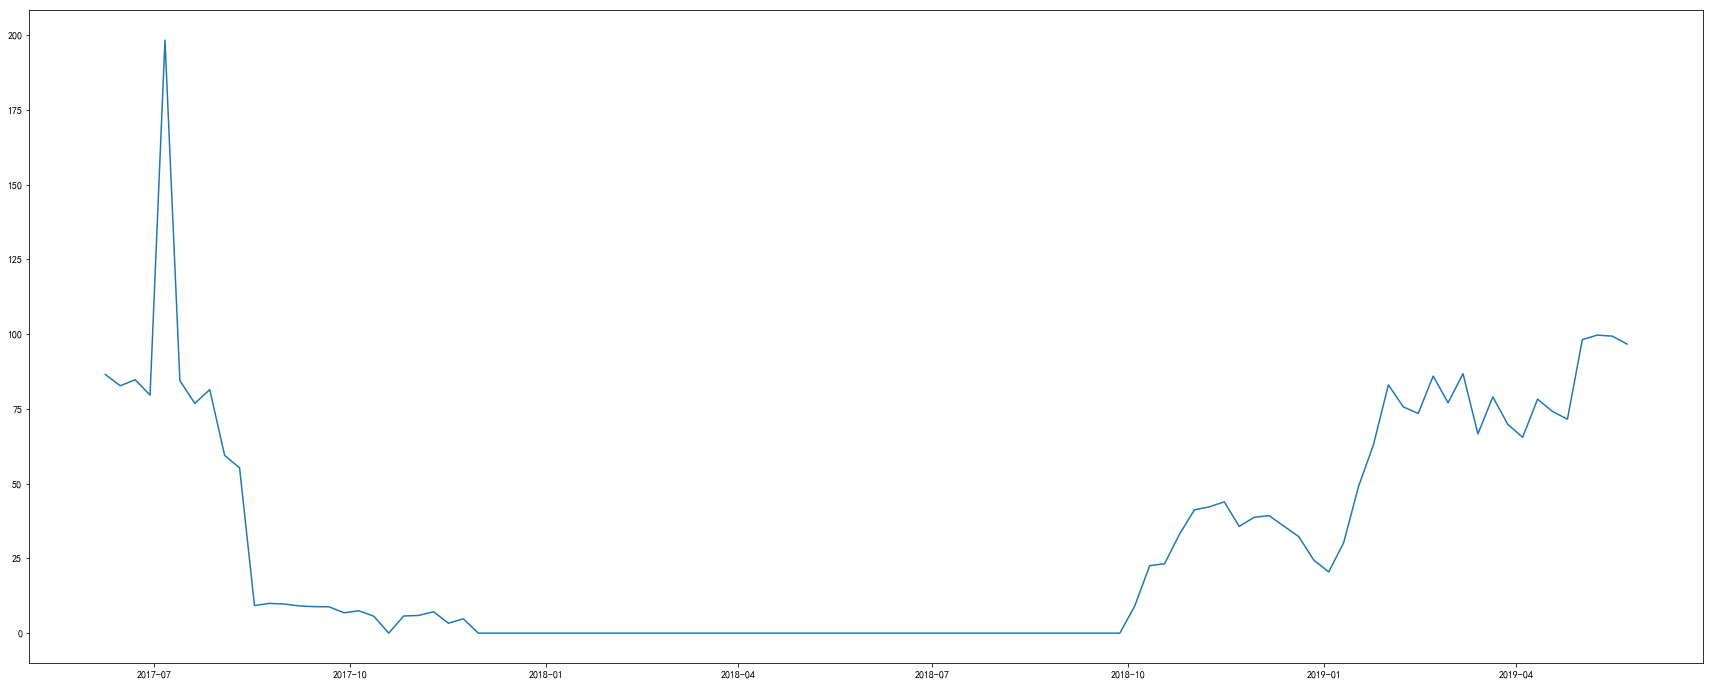

In [98]:
register_matplotlib_converters()
plt.plot(ts)

### 平稳性检验函数

In [99]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #移动平均和移动方差
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #把移动平均和移动方差画出来:
    orig = plt.plot(timeseries, color='blue',label='原始曲线')
    mean = plt.plot(rolmean, color='yellow', label='移动平均')
    std = plt.plot(rolstd, color='black', label = '移动方差')
    plt.legend(loc='best')
    plt.title(u'绘制移动平均数和移动方差，观察它是否随着时间变化')
    plt.show(block=False)
    
    #进行单位根检验:
    print('单位根检验:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dfoutput.loc['p-value']>0.01:
        print('p值大于0.01，不能拒绝原假设，说明时间序列是非平稳的')
    else:
        print('p值小于0.01，拒绝原假设，说明时间序列是平稳的')
    return dfoutput.loc['p-value']<0.01
    #返回时间序列是否平稳的判断值
    '''
    单位根的原假设为序列具有单位根，即非平稳，
    对于一个平稳的时序数据，就需要在给定的置信水平上显著，拒绝原假设。
    '''

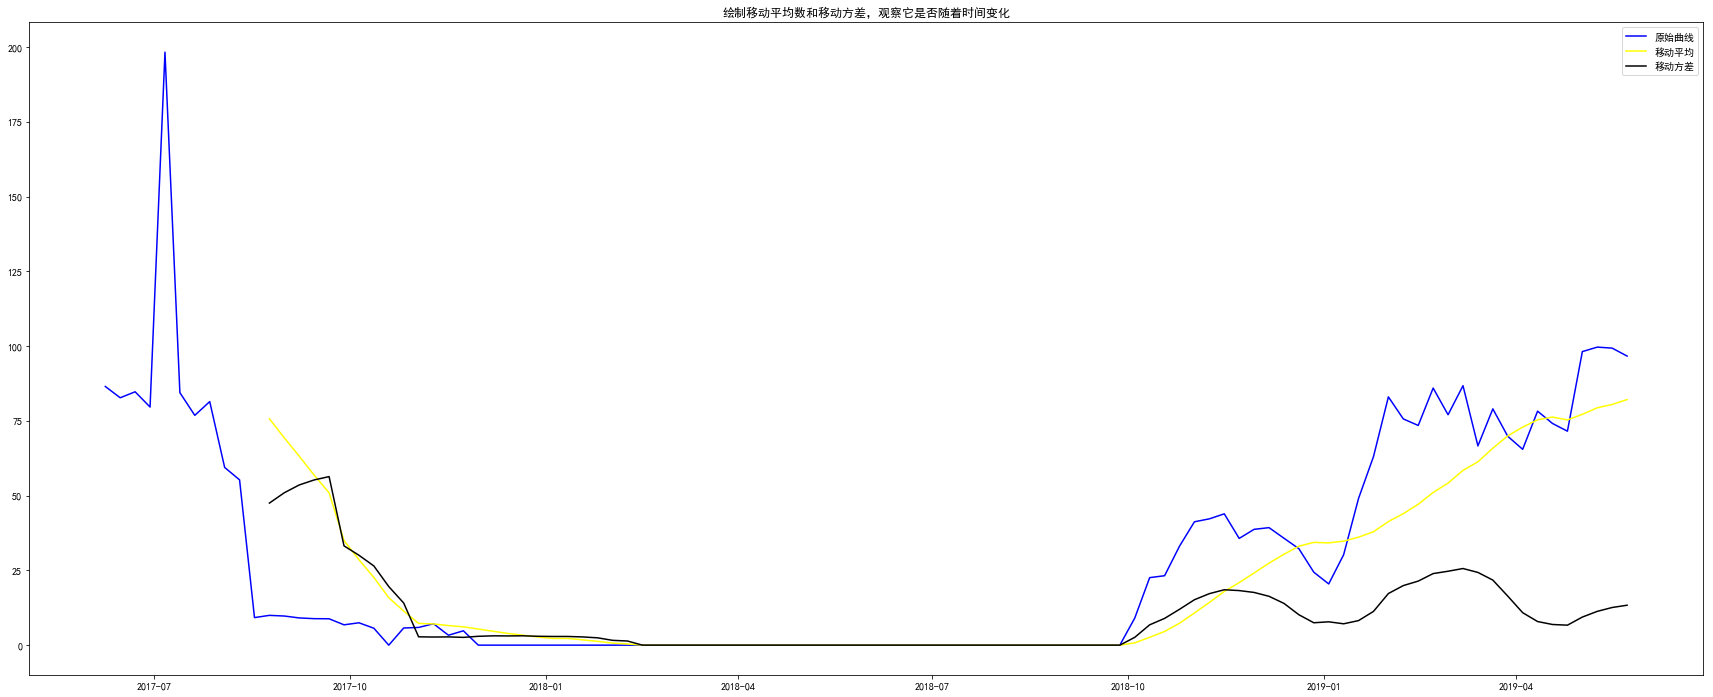

单位根检验:
Test Statistic                  -2.406929
p-value                          0.139790
#Lags Used                       0.000000
Number of Observations Used    102.000000
Critical Value (1%)             -3.496149
Critical Value (5%)             -2.890321
Critical Value (10%)            -2.582122
dtype: float64
p值大于0.01，不能拒绝原假设，说明时间序列是非平稳的


False

In [100]:
test_stationarity(ts)

# 平稳性的处理


## 预测和消除趋势


## Smoothing:

### 移动平均

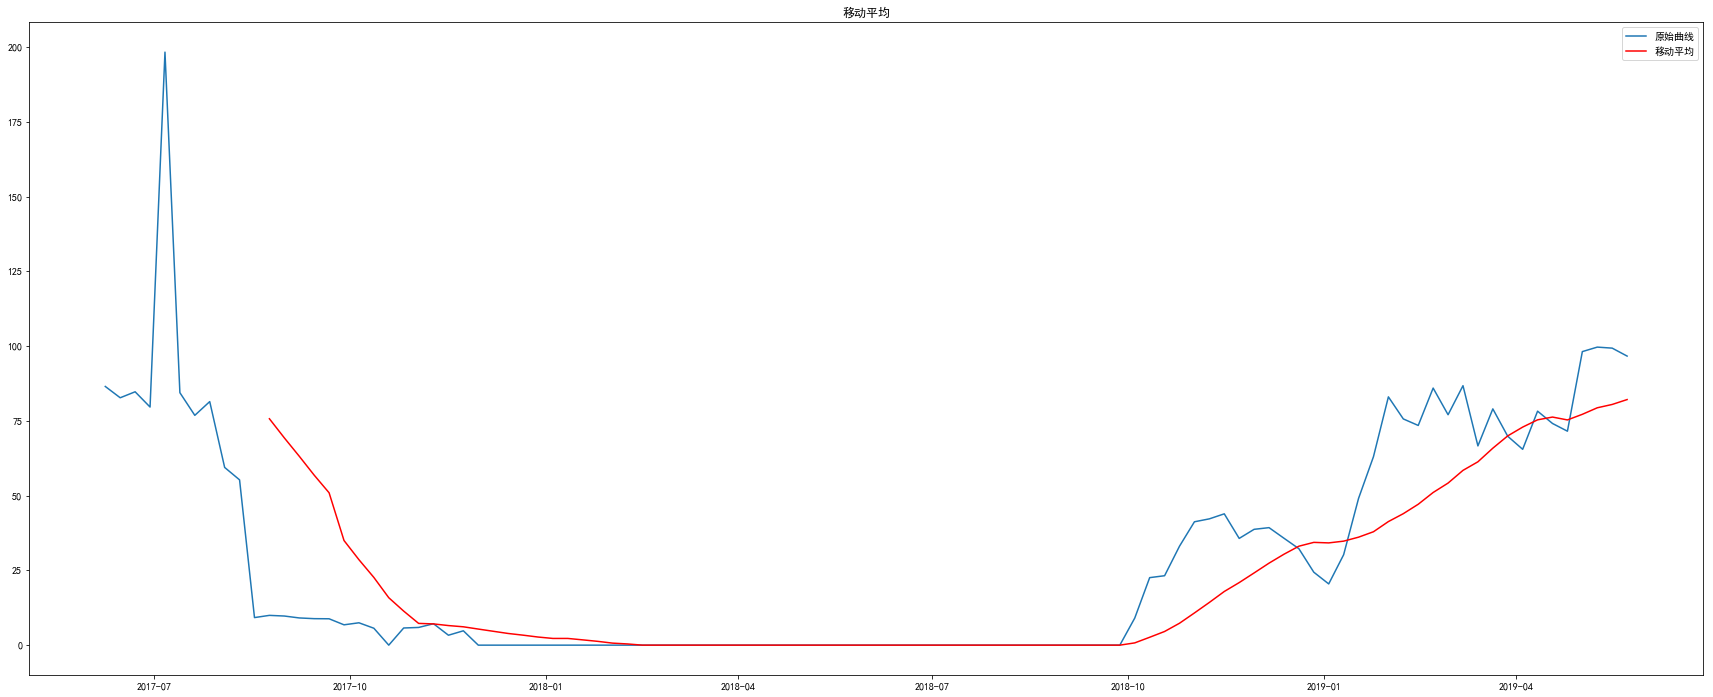

In [101]:
moving_avg = ts.rolling(12).mean()
plt.plot(ts,label='原始曲线')
plt.plot(moving_avg, color='red',label='移动平均')
plt.title('移动平均')
plt.legend(loc='best')
plt.show()

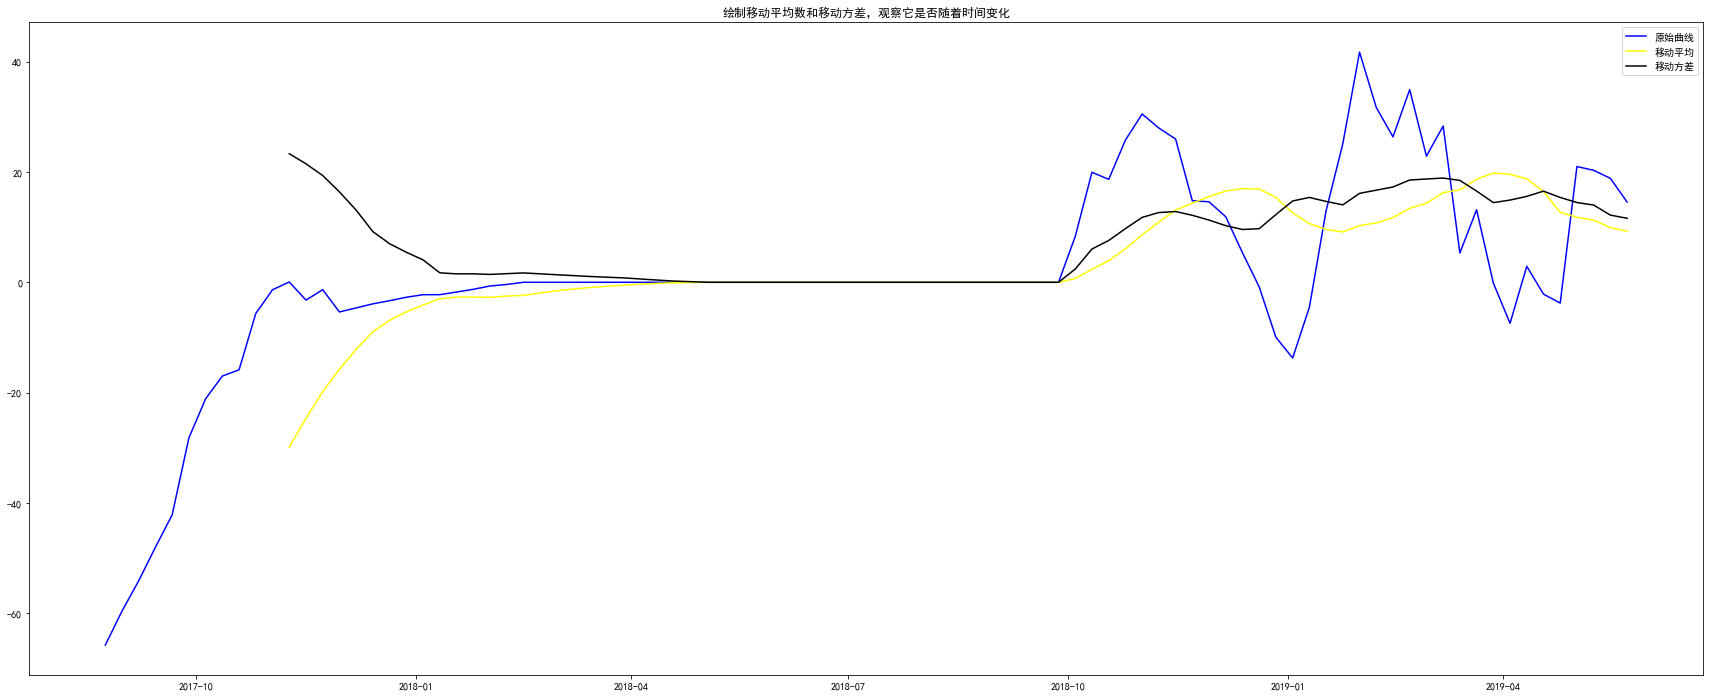

单位根检验:
Test Statistic                 -3.247859
p-value                         0.017376
#Lags Used                      9.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
p值大于0.01，不能拒绝原假设，说明时间序列是非平稳的


False

In [102]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_moving_avg_diff)

### 指数平滑法

In [103]:
# expwighted_avg = ts.ewm(halflife=12).mean()
# plt.plot(ts,label='原始曲线')
# plt.plot(expwighted_avg, color='red',label='指数平滑曲线')
# plt.title('指数平滑处理')
# plt.legend(loc='best')
# plt.show()
#expwighted_avg.plot(style='k--')

In [104]:
# ts_ewma_diff = ts - expwighted_avg
# test_stationarity(ts_ewma_diff)

## 消除趋势和季节性

### 差分:

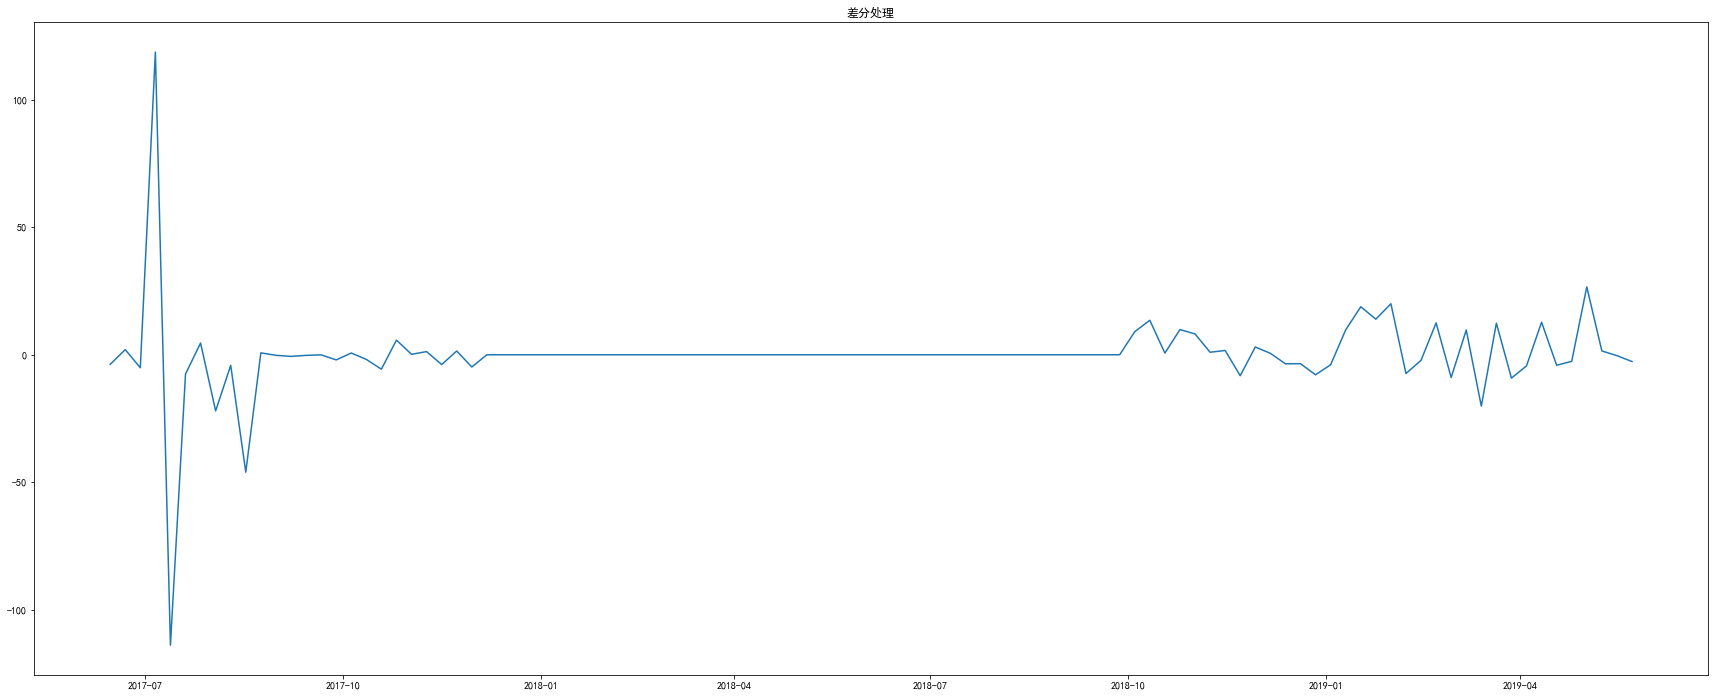

In [105]:
#直接对原始数据取一阶差分:
ts_diff = ts - ts.shift(1)
plt.plot(ts_diff)
plt.title('差分处理')
plt.show()

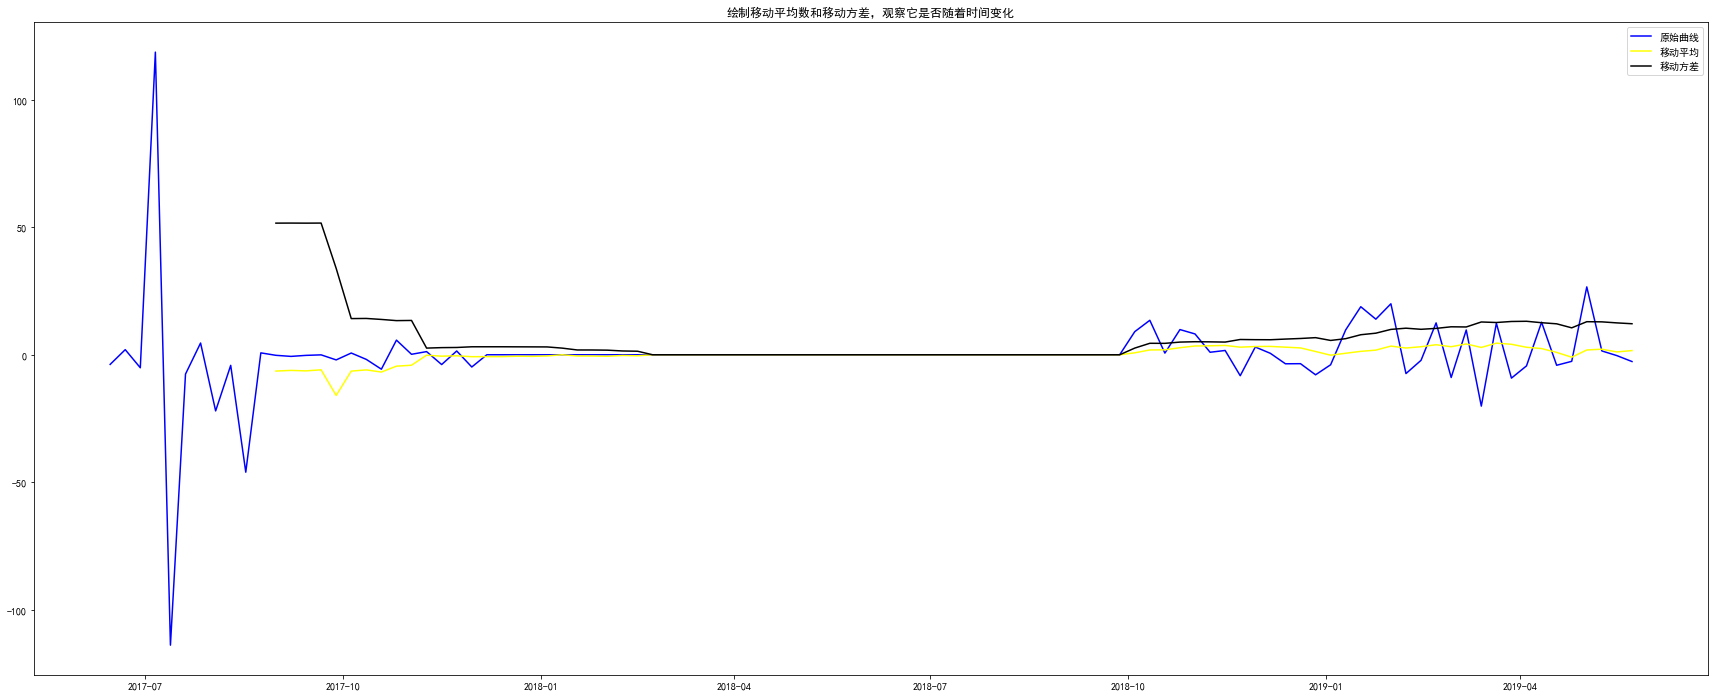

单位根检验:
Test Statistic                -7.234267e+00
p-value                        1.958092e-10
#Lags Used                     3.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64
p值小于0.01，拒绝原假设，说明时间序列是平稳的


True

In [106]:
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)

# 构建模型

## 时间序列的分解（分解后分开预测）

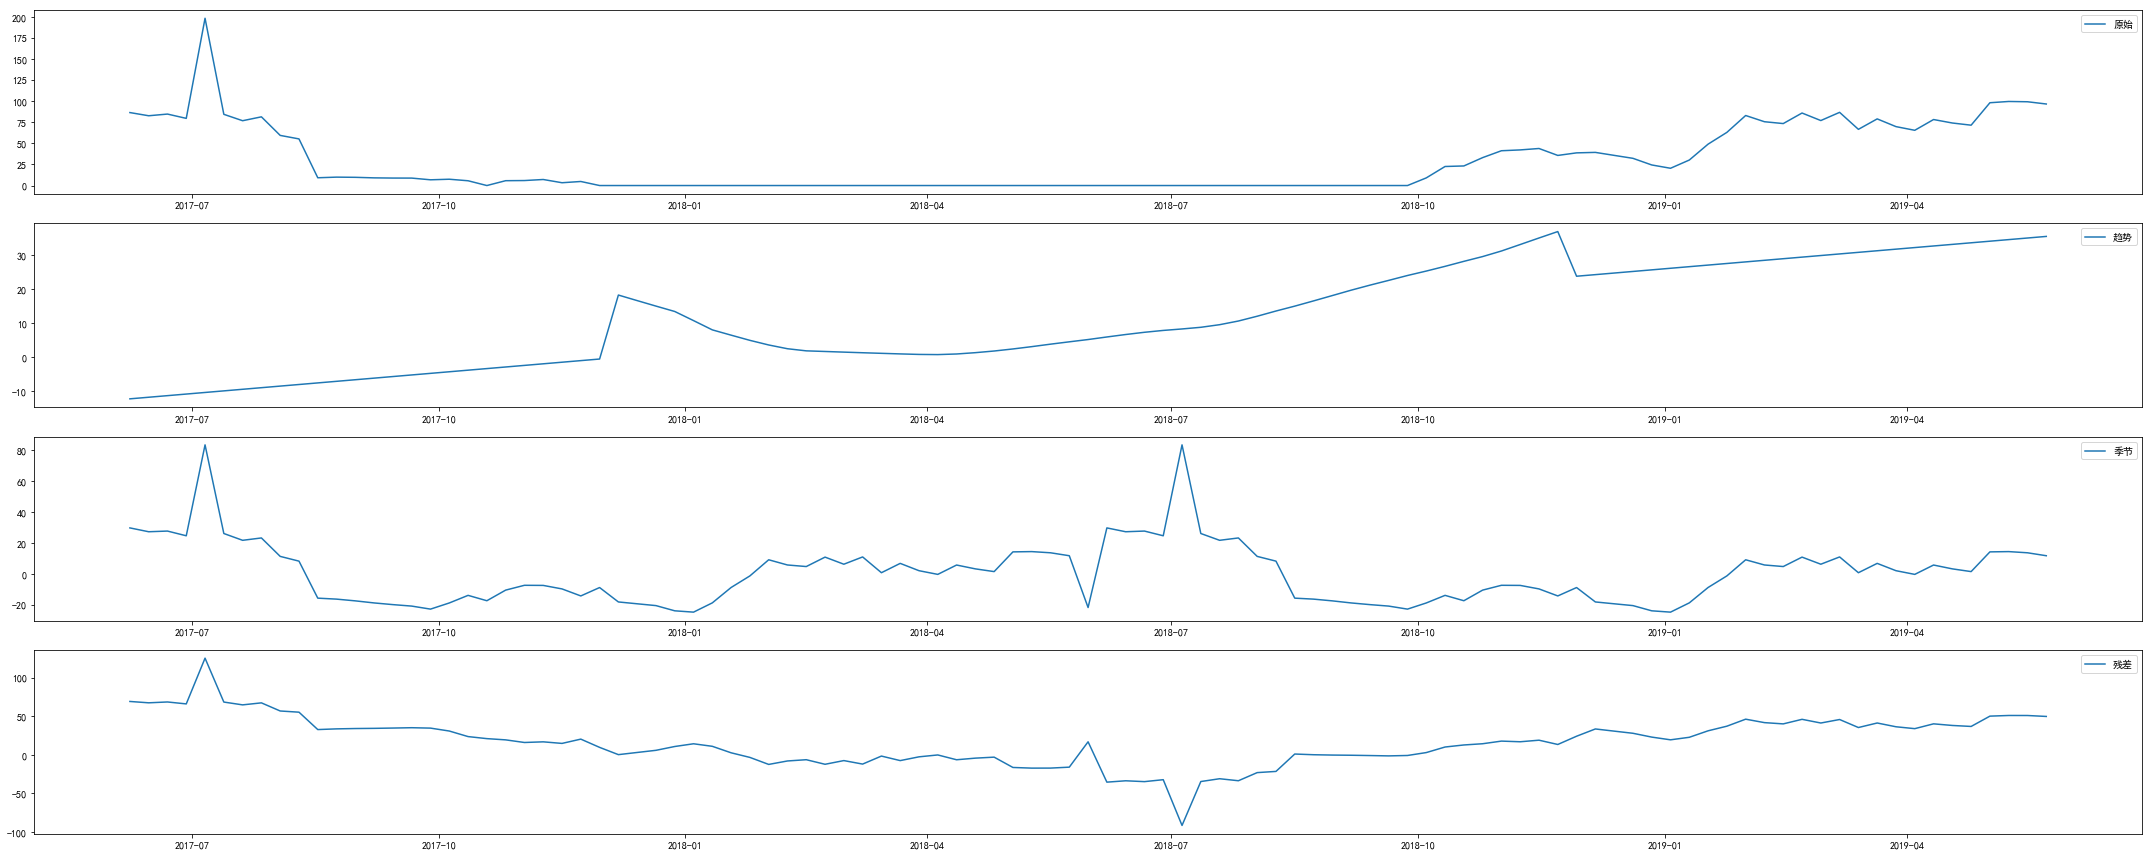

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,extrapolate_trend='freq')
# 显式调用seasonal_decompose函数的extrapolate_trend参数可以强制提取残差，同时使趋势曲线更加平滑
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='原始')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='趋势')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='季节')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='残差')
plt.legend(loc='best')
plt.tight_layout()

In [108]:
trend_year_increase = df_S_Curve[df_S_Curve['编码结构'].isin([df_coding_structure.loc['3000950193']['编码结构']])].loc[int(df_coding_structure.loc['3000950193'].lhrq)]


In [109]:
print(trend_year_increase)
trend_week_increase = pow(trend_year_increase['year_increase']+1,1/52)

year_increase                   0.925225
编码结构             046_industry_capacity_h
Name: 2009, dtype: object


In [110]:
trend_last = trend[-1]
for i in range(52):
    #季节变动每一年都是一样的，预测季节因素只需要将前一年的数据复制到新一年即可
    trend_last = trend_last*trend_week_increase
    trend = trend.append(pd.Series(trend_last,index=[trend.index[-1]+timedelta(days=7)]))

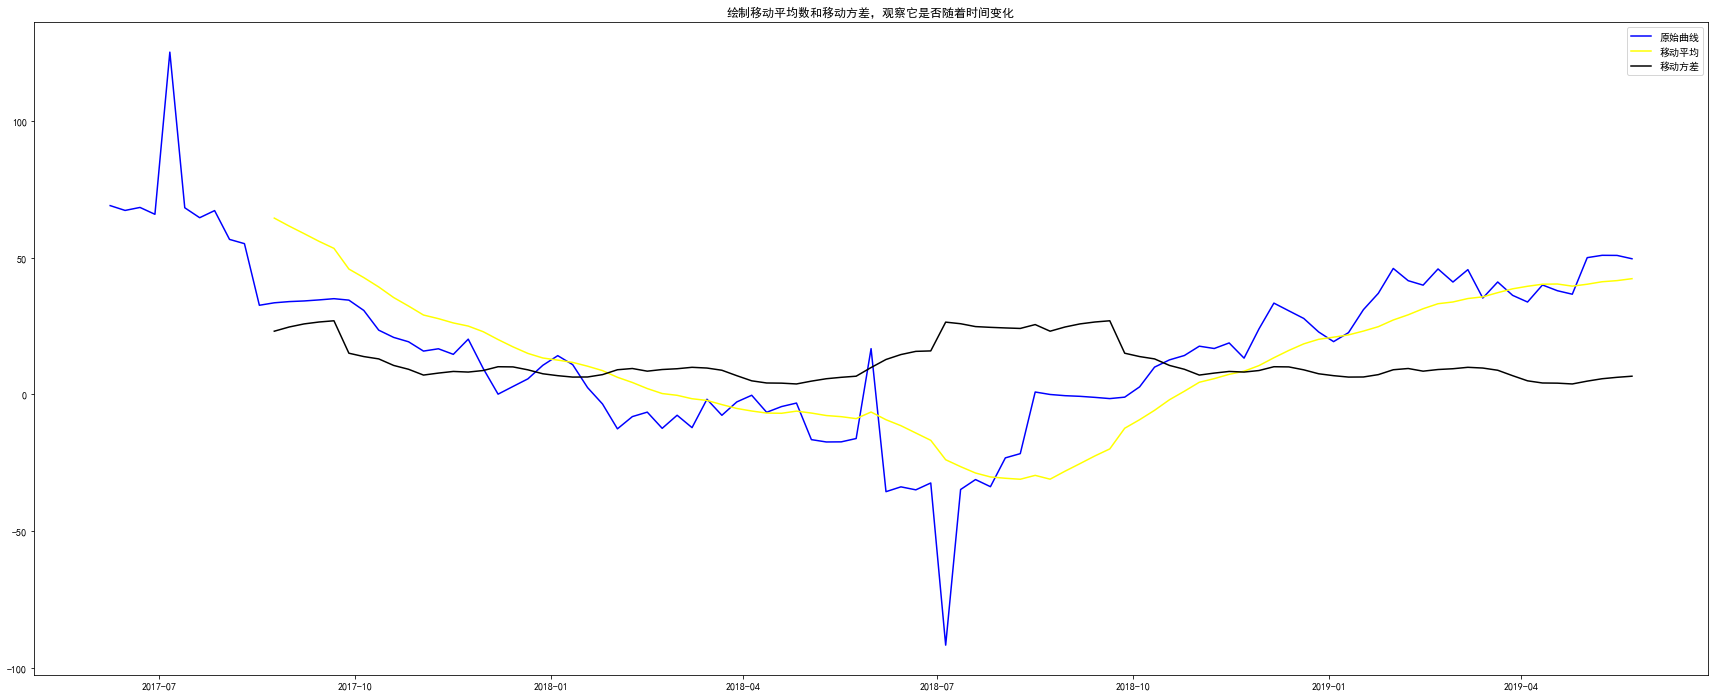

单位根检验:
Test Statistic                  -1.863859
p-value                          0.349249
#Lags Used                       1.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64
p值大于0.01，不能拒绝原假设，说明时间序列是非平稳的


False

In [111]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

## 利用交叉验证法求预测模型参数

# 创建训练集和测试集
size = int(len(ts_diff) * 0.8)
train, test = ts_diff[0:size], ts_diff[size:len(ts_diff)]
register_matplotlib_converters()
plt.plot(train.index, train, color='blue', label='训练集')
plt.plot(test.index, test, color='green', label='测试集')
plt.legend()
plt.title('真实数据的训练集和测试集')
plt.show()

#样本内预测的结果和预测误差
def compare_ARIMA_modes_testing(order):
    history = [x for x in train]
    predictions_f = list()
    predictions_p = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=-1)
        yhat_f = model_fit.forecast()[0][0]
        yhat_p = model_fit.predict(start=len(history), end=len(history))[0]
        predictions_f.append(yhat_f)
        predictions_p.append(yhat_p)
        history.append(test[t])
    #mean_squared_error即为“误差”的平方的期望值
    error_f = mean_squared_error(test, predictions_f)
    error_p = mean_squared_error(test, predictions_p)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p))
    return {'Predictions forecast': pd.Series(predictions_f,index=test.index),
            'Predictions predict': pd.Series(predictions_p,index=test.index),
            'MSE forecast': error_f,
            'MSE predict': error_p}

#利用交叉验证法寻找最佳阶数
def cross_proper_model(maxLag):
    init_error = sys.maxsize
    init_p = 0
    init_q = 0
    init_properModel = None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            arima = compare_ARIMA_modes_testing((p,1,q))
            error_f = arima['MSE forecast']
            error_p = arima['MSE predict']
        if error_f < init_error or error_p < init_error:
                init_p = p
                init_q = q
                init_properModel =arima
                init_error = min(error_f,error_p)
    return [init_error, init_p, init_q, init_properModel]

## 利用贝叶斯信息准则求预测模型参数

In [112]:
#利用贝叶斯信息准则（BIC）寻找最佳阶数，使得BIC达到最小值的(p, q)即为该准则下的最优模型的阶数
def proper_model(data_ts, maxLag):
    init_bic = sys.maxsize
    init_p = 0
    init_q = 0
    init_properModel = None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            model = ARMA(data_ts, order=(p, q),freq=data_ts.index.inferred_freq)
            try:
                results_ARMA = model.fit(disp=-1, method='css')
            except:
                continue#忽略所有异常
            bic = results_ARMA.bic
            if bic < init_bic:
                init_p = p
                init_q = q
                init_properModel = results_ARMA
                init_bic = bic
    return [init_bic, init_p, init_q, init_properModel]

## 预测模型（针对趋势和残差）

In [113]:
#样本外预测
def compare_ARIMA_modes(series,order):
    history_f = [x for x in series]
    history_p = [x for x in series]
    series_p = series
    series_f = series
#     for t in range(52):滚动预测的效果不佳
    model = ARIMA(history_f, order=order)
    model_fit = model.fit(disp=-1)
    yhat_f = model_fit.forecast(steps=104)[0]
    model = ARIMA(history_p, order=order)
    model_fit = model.fit(disp=-1)
    yhat_p = model_fit.predict(start=len(history_p), end=len(history_p)+104)
    
    #附加新元素时也加上一个单位的索引
    for t in range(104,1,-1):
        series_p = series_p.append(pd.Series(yhat_p[-t],index=[series_p.index[-1]+timedelta(days=7)]))
        series_f = series_f.append(pd.Series(yhat_f[-t],index=[series_f.index[-1]+timedelta(days=7)]))
    return {'Predictions forecast': series_f[series.index[-1]:series_f.index[-1]],
            'Predictions predict': series_p[series.index[-1]:series_p.index[-1]]}

In [114]:
#样本外预测
def LinearRegression_modes(series):
    history = [x for x in series]
    series_p = series
    #lr = LassoCV(cv=tscv)
    lr = LinearRegression(normalize= "l1") 
    #可以尝试随机森林的效果，也不错。也可以做多模型结果融合，请自己尝试。
    #lr = RandomForestRegressor(n_estimators=100, max_depth=10) #lag_start = 288, lag_end = 320
    # lr = RidgeCV(cv = tscv)
    lr.fit(np.array(range(len(series.index))).reshape(1, -1), np.array(series.values).reshape(1, -1))
    #train_score = lr.score(x_train_scaled, y_train)
    #test_score = lr.score(x_test_scaled, y_test)
    #print("num_tree", each, "score", train_score, test_score)
    #print(x_pred)
    # now 拟合
    print(np.array(range(len(series.index))).reshape(1, -1))
    y_fit = lr.predict(np.array(range(len(series.index),len(series.index)+103)).reshape(1, -1))
    print(y_fit[0])
    print(series.values)
    #附加新元素时也加上一个单位的索引
    for t in range(52,1,-1):
        series_p = series_p.append(pd.Series(y_fit[0][-t],index=[series_p.index[-1]+timedelta(days=7)]))
    return {'Predictions': series_p[series.index[-1]:series_p.index[-1]]}

In [115]:
#季节变动每一年都是一样的，预测季节因素只需要将前一年的数据复制到新一年即可
def season_forcast_year(seasonal):
    seasonal_f = seasonal
    seasonal_f.index = seasonal.index+timedelta(weeks=104)
    return seasonal_f

In [116]:
residual_model =  compare_ARIMA_modes(residual,(18, 1, 8))

C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\envs\p36workshop\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


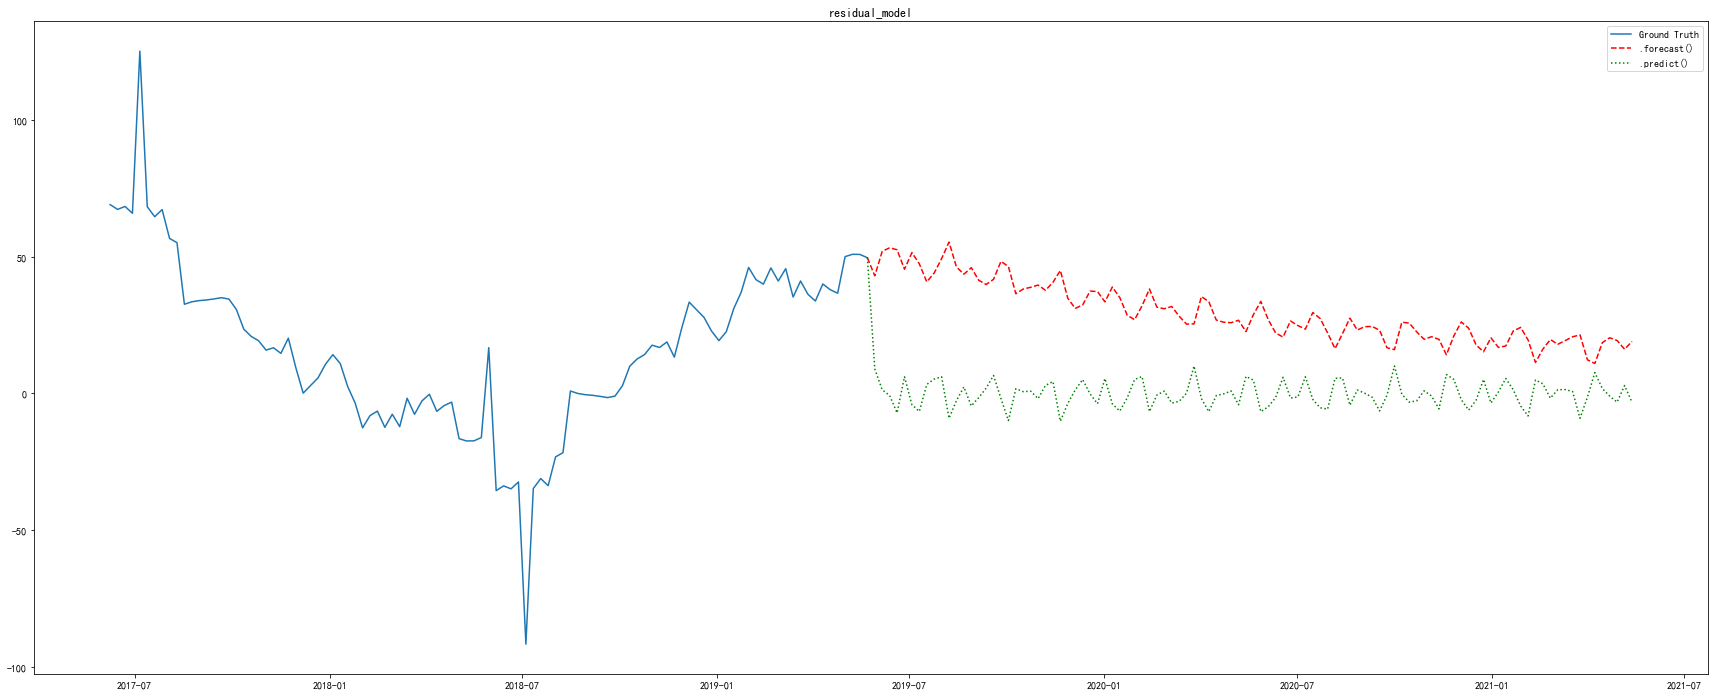

In [117]:
plt.plot(residual, label='Ground Truth')
plt.plot(residual_model['Predictions forecast'], color='red', label='.forecast()',linestyle='dashed')
plt.plot(residual_model['Predictions predict'], color='green', label='.predict()',linestyle='dotted')
plt.legend(loc='best')
plt.title('residual_model')
plt.show(block=False)

In [118]:
seasonal_f=season_forcast_year(seasonal)

In [136]:
forcast_model = trend[-52:-1]+2.5+residual_model['Predictions forecast']+seasonal_f
forcast_model.dropna(inplace=True)
forcast_model.head()

2019-06-06    120.445550
2019-06-13    119.744352
2019-06-20    119.907449
2019-06-27    110.196235
2019-07-04    175.674474
dtype: float64

In [137]:
forcast_model_least=trend[-52:-1]+2.5+seasonal_f
forcast_model_least.dropna(inplace=True)
#forcast_model_least.fillna(11.578118,inplace=True)
forcast_model.head()

2019-06-06    120.445550
2019-06-13    119.744352
2019-06-20    119.907449
2019-06-27    110.196235
2019-07-04    175.674474
dtype: float64

# 预测

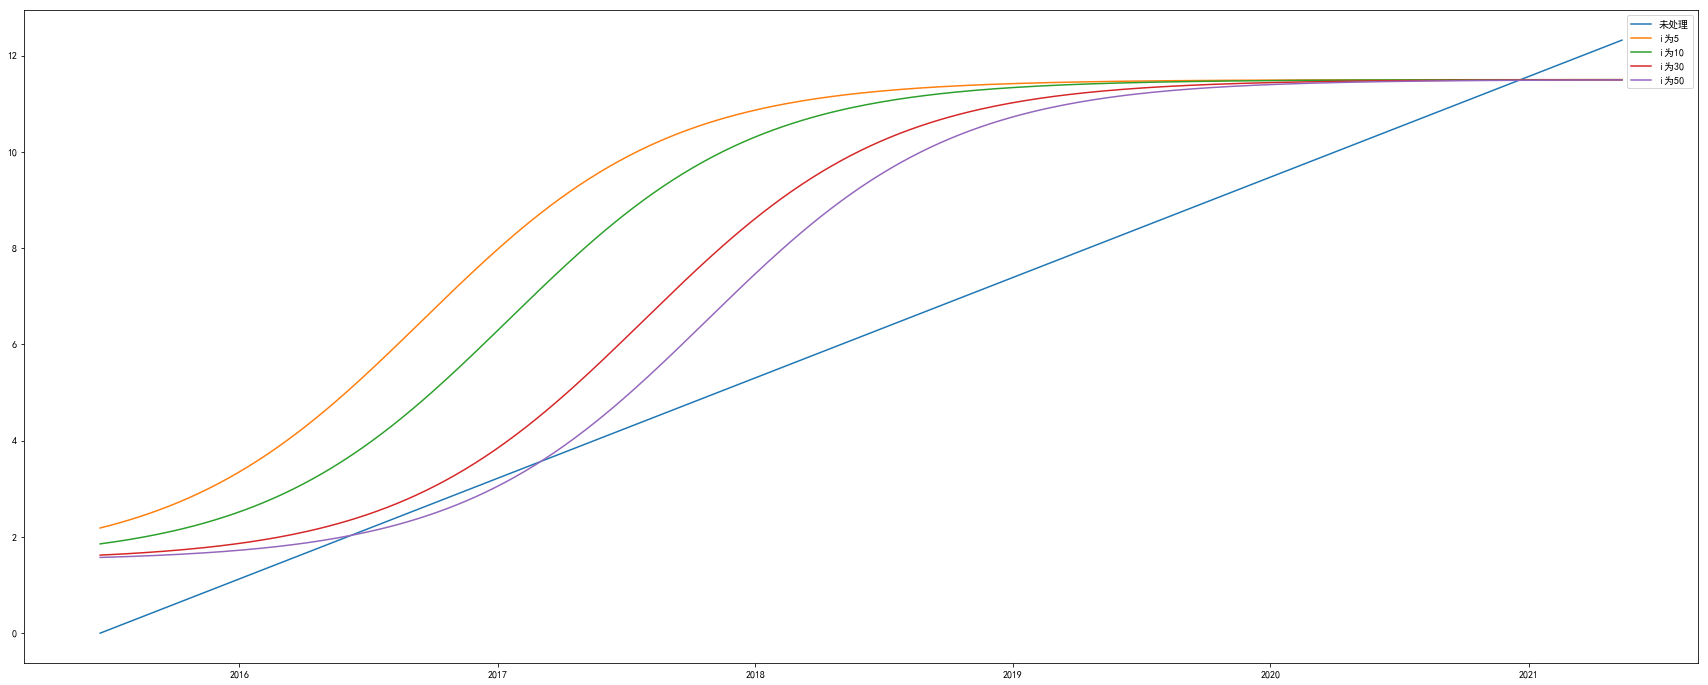

In [138]:
import math
ts_past_list = (ts.index-timedelta(weeks=103)).to_list()
ts_later_list = (ts.index+timedelta(weeks=103)).to_list()
ts_list = ts.index.to_list()
ts_list=ts_past_list+ts_list+ts_later_list
series=pd.Series(np.arange(0, 12.36, 0.04),index=ts_list)
plt.plot(series,label='未处理')
plt.legend(loc='best')
for i in [5,10,30,50]:
    series_p=series.apply(lambda x:10/(1+i*math.e**(1-x))+1.5)
    plt.plot(series_p,label='i为'+str(i))
    plt.legend(loc='best')

In [122]:
print(type(ts.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


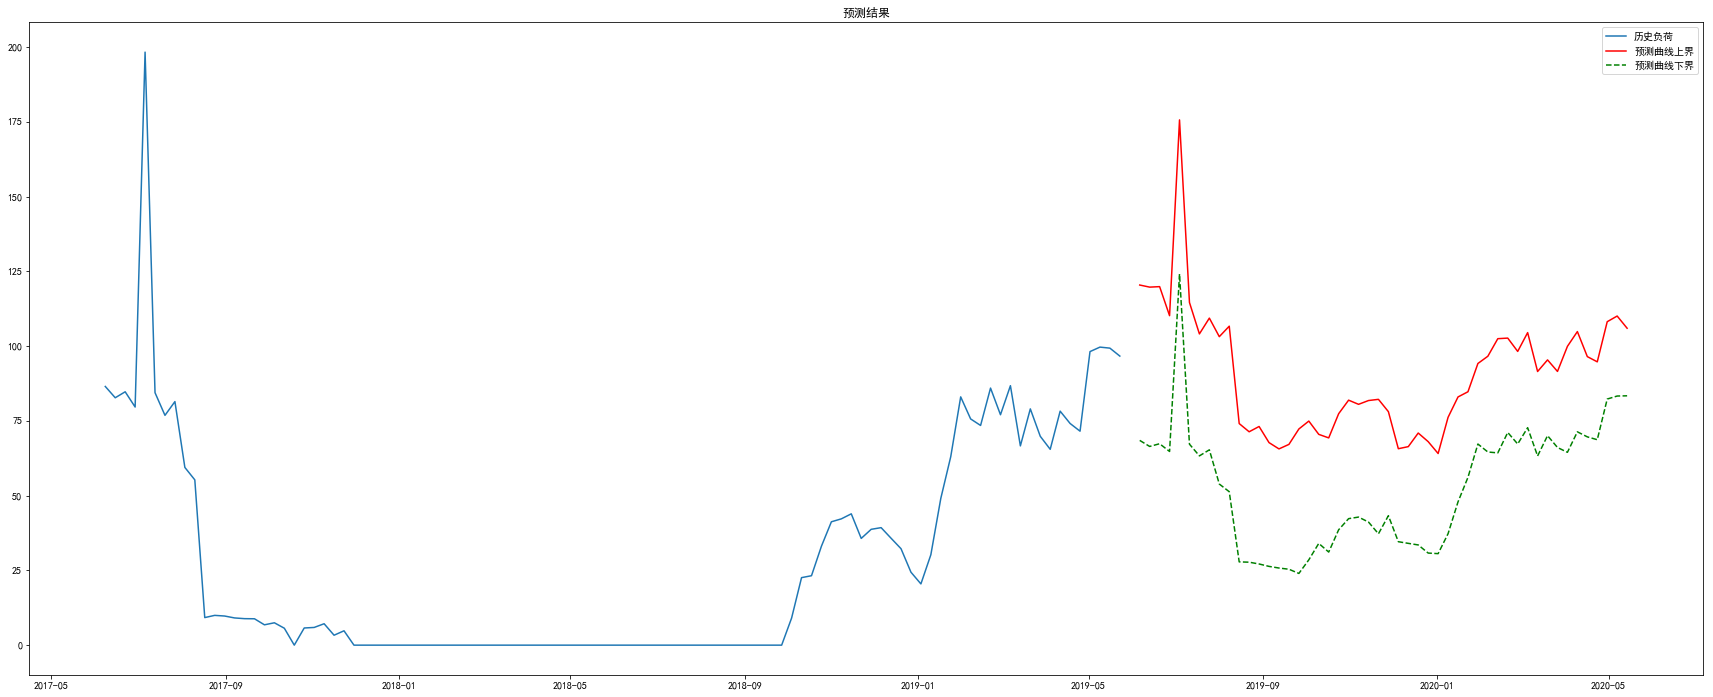

In [139]:
plt.plot(ts, label='历史负荷')
plt.plot(forcast_model, color='red', label='预测曲线上界')
plt.plot(forcast_model_least, color='green', label='预测曲线下界',linestyle='dashed')
plt.legend(loc='best')
plt.title('预测结果')
plt.savefig('foo.png')
plt.show()

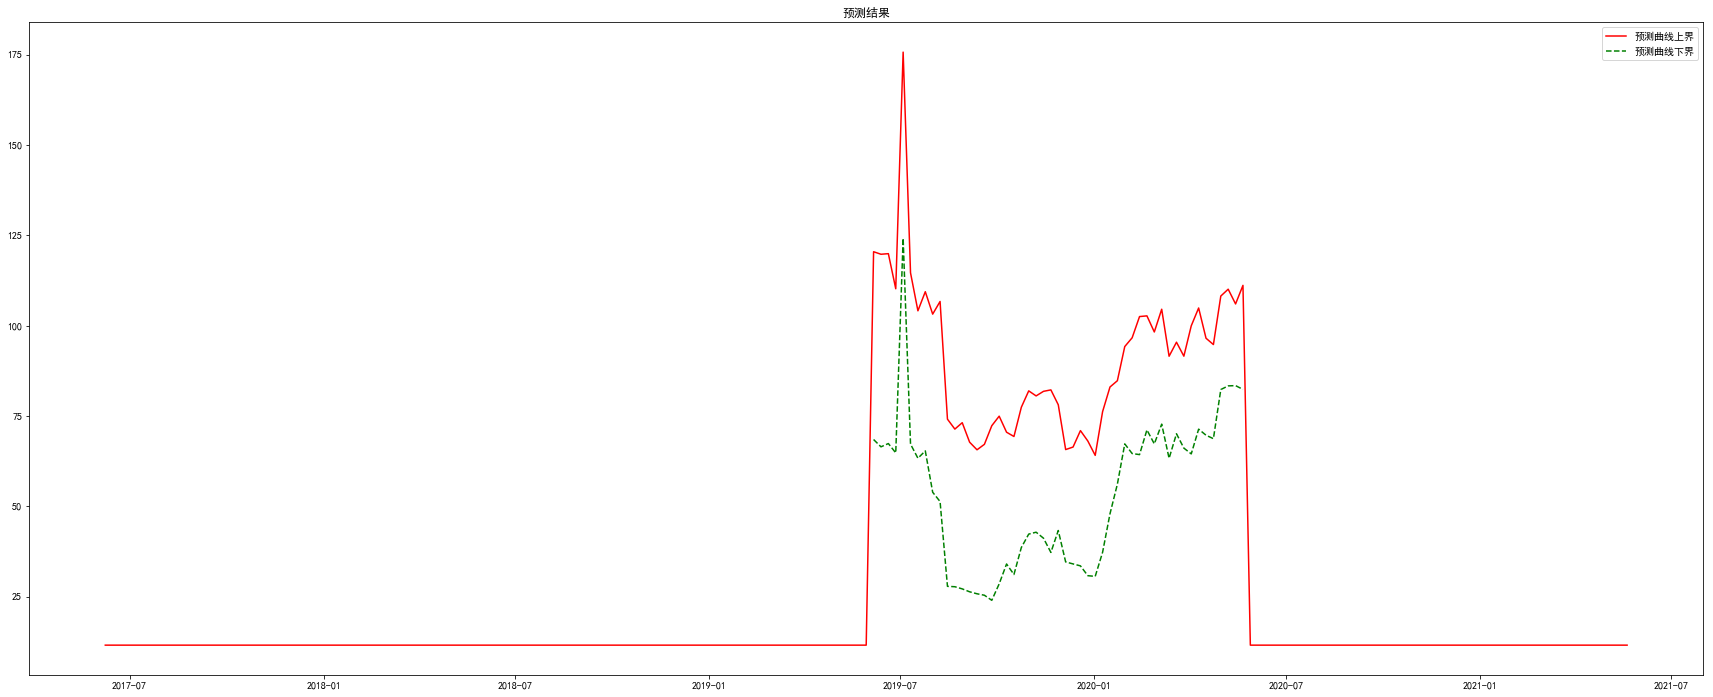

In [124]:
plt.plot(forcast_model, color='red', label='预测曲线上界')
plt.plot(forcast_model_least, color='green', label='预测曲线下界',linestyle='dashed')
plt.legend(loc='best')
plt.title('预测结果')
plt.savefig('foo.png')
plt.show()

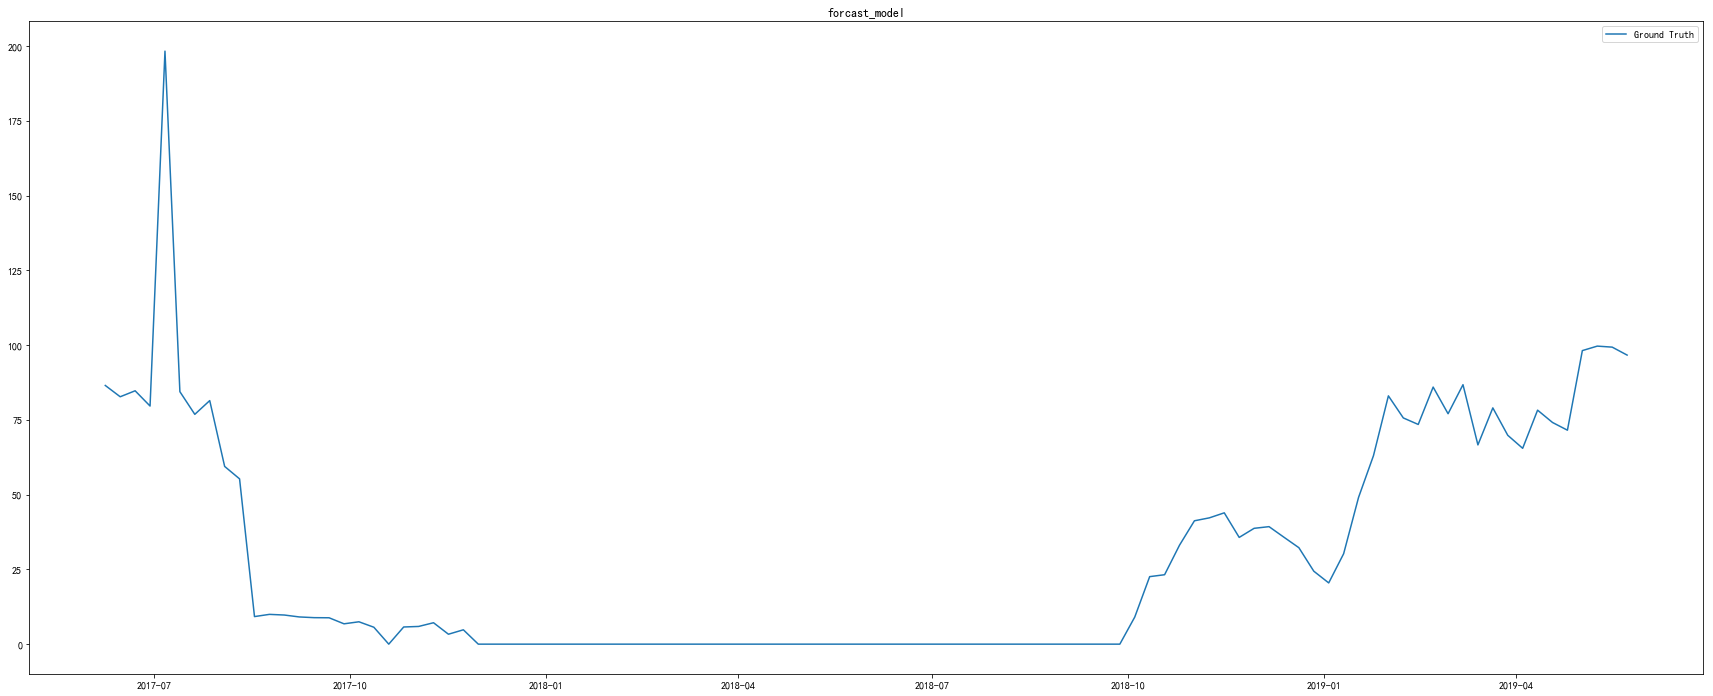

In [125]:
plt.plot(ts, label='Ground Truth')

plt.legend(loc='best')
plt.title('forcast_model')
plt.show()

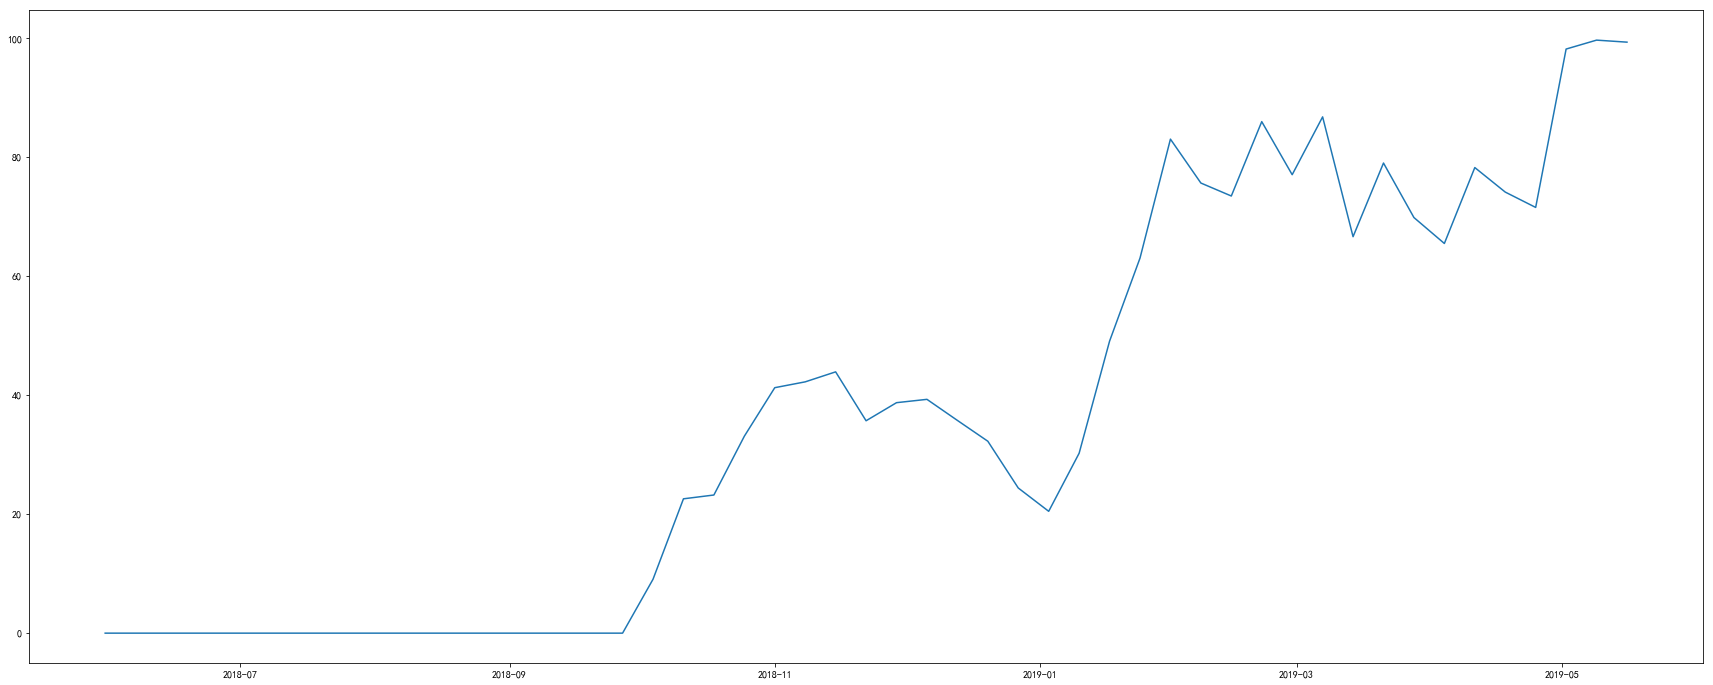

In [126]:
plt.plot(ts[-52:-1])

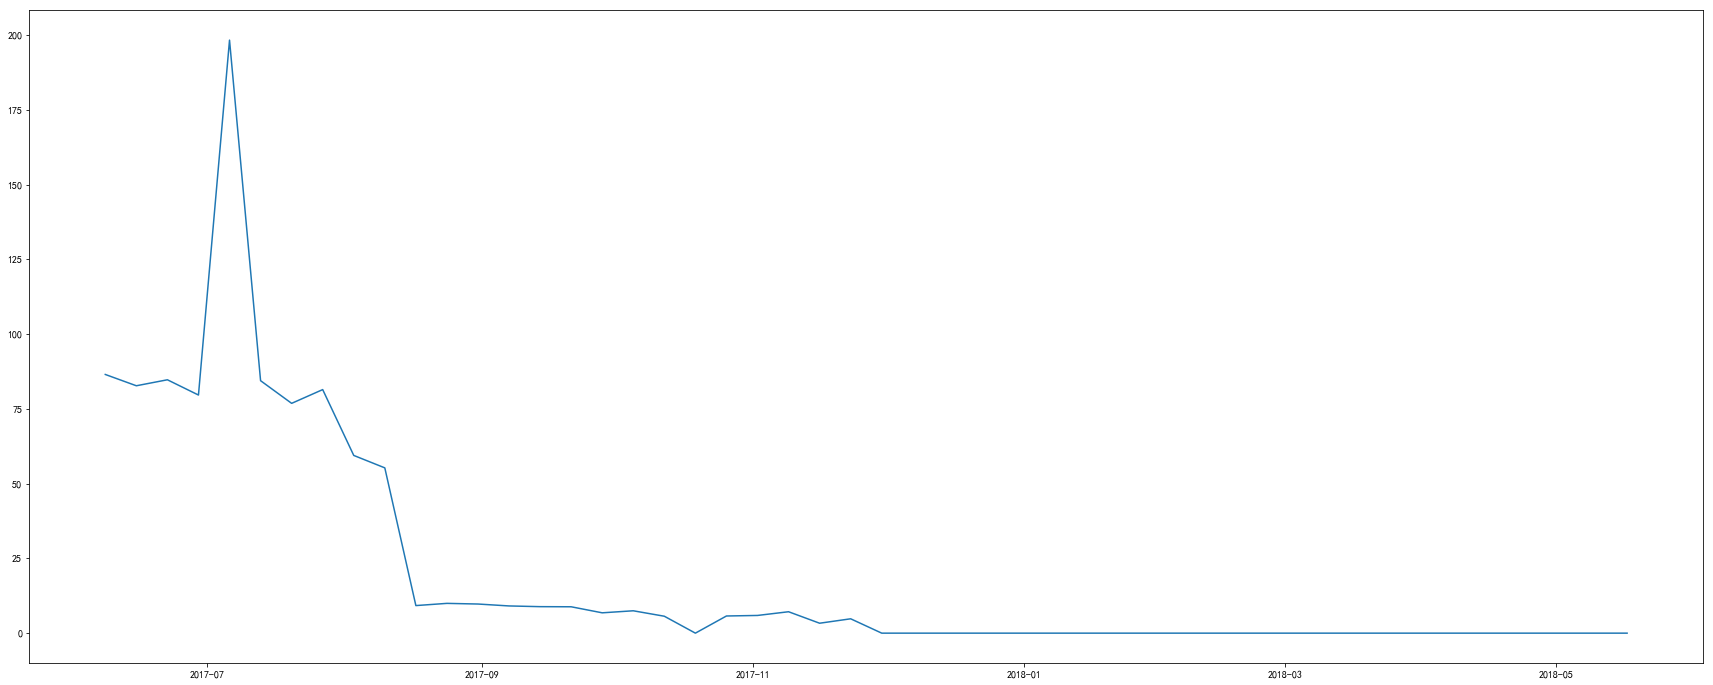

In [127]:
plt.plot(ts[-104:-53])

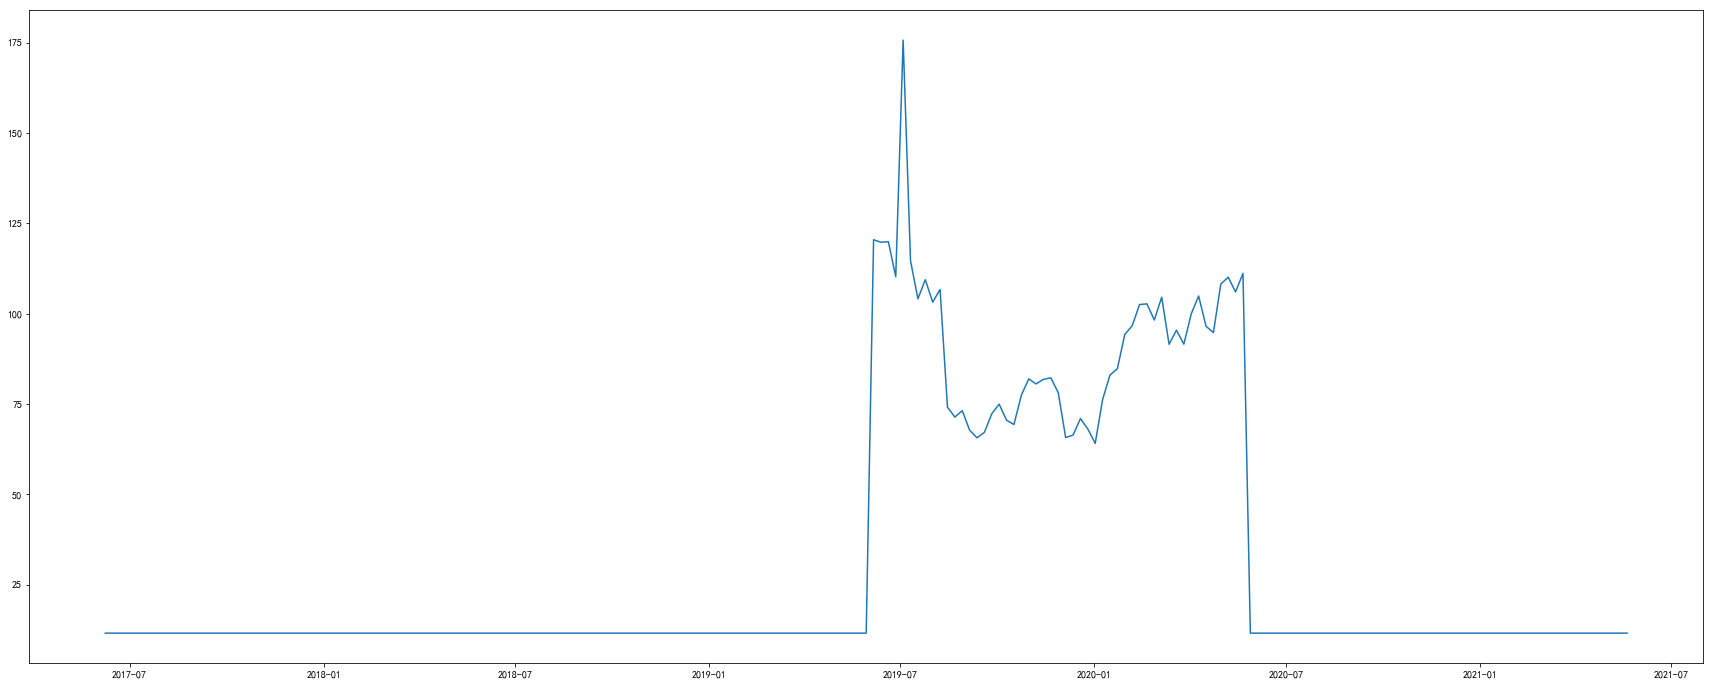

In [128]:
plt.plot(forcast_model)

# 预测时间序列

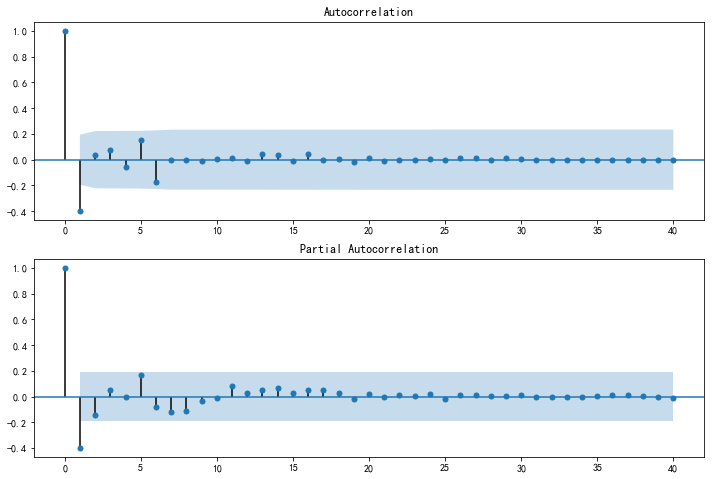

In [66]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff, lags=40, ax=ax1) #从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff, lags=40, ax=ax2)

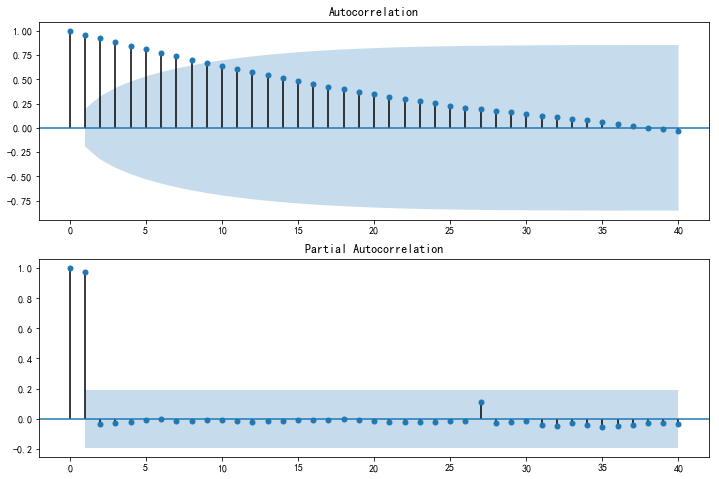

In [67]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trend.dropna(), lags=40, ax=ax1) #从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trend.dropna(), lags=40, ax=ax2)

### ACF & PACF Plots

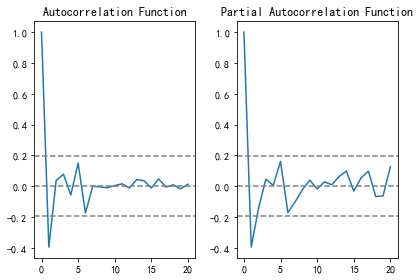

In [68]:
#选择差分处理后的结果进行预测
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#两条虚线之间是置信区间

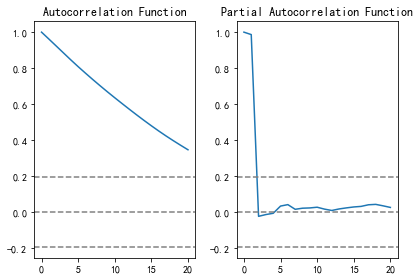

In [69]:
#选择季节分解后的趋势进行预测
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(trend.dropna(), nlags=20)
lag_pacf = pacf(trend.dropna(), nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(trend.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

#两条虚线之间是置信区间

### AR Model:

In [70]:
#MA model:
model = ARIMA(ts_log, order=(1, 1, 2),freq=ts_log.index.inferred_freq)  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

NameError: name 'ts_log' is not defined

### MA Model

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2),freq=ts_log.index.inferred_freq)  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2),freq=ts_log.index.inferred_freq)  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### 预测还原:

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_diff_cumsum)

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)
predictions_ARIMA_log=predictions_ARIMA_log.rename('predictions_ARIMA_log')
predictions_ARIMA_log.to_csv(predictions_ARIMA_log.name+'.csv',header=True)

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

### 对分解出来的趋势进行预测